In [1]:
import scipy.io
import numpy as np
import pandas as pd

In [2]:
mat = scipy.io.loadmat('china//data//data_00001.mat')

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Jan 10 12:44:24 2019',
 '__version__': '1.0',
 '__globals__': [],
 'ecg': array([[-0.13405921],
        [-0.21474772],
        [-0.22356306],
        ...,
        [ 0.00581536],
        [ 0.01781873],
        [ 0.02576693]])}

In [4]:
mat['ecg'].shape

(5000, 1)

In [5]:
ref = scipy.io.loadmat('china//ref//R_00001.mat')

In [6]:
max(ref['R_peak'].shape)

16

In [7]:
def get_dataset():
    data = []
    for i in range(1, 2001, 1):
        mat = scipy.io.loadmat("china//data//data_{:05d}.mat".format(i))
        ref = scipy.io.loadmat("china//ref//R_{:05d}.mat".format(i))
        ecg = np.reshape(mat["ecg"], (5000,))
        r_peak = np.reshape(ref["R_peak"], (max(ref['R_peak'].shape),)).astype(np.int32)
        is_r_peak = np.zeros((5000,), dtype=np.int32)
        is_r_peak[r_peak] = 1
        data.append({"ecg": ecg,
                        "is_r_peak": is_r_peak,
                       "r_peak": r_peak})
    return pd.DataFrame.from_dict(data, orient='columns')
        

In [8]:
dataset = get_dataset()

In [9]:
dataset.head()

,ecg,is_r_peak,r_peak
0,"[-0.13405921413885352, -0.21474771537475584, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[381, 674, 969, 1198, 1556, 1845, 2138, 2431, ..."
1,"[0.47198353280431776, 0.6738849259204285, 0.57...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[385, 661, 974, 1207, 1557, 1832, 2142, 2420, ..."
2,"[0.5275130125839788, 0.7764709089168801, 0.729...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[387, 674, 976, 1198, 1558, 1845, 2144, 2430, ..."
3,"[-0.4074087051006681, -0.6210424172689245, -0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[389, 659, 976, 1202, 1559, 1833, 2146, 2415, ..."
4,"[0.6138668013405897, 0.9190979337867135, 0.891...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[389, 668, 977, 1202, 1560, 1839, 2145, 2418, ..."


In [10]:
from basics import bandpass

In [11]:
dataset['filtered_ecg'] = dataset["ecg"].apply(lambda ecg: bandpass(ecg, 500, 1, 50))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [12]:
dataset.head()

,ecg,is_r_peak,r_peak,filtered_ecg
0,"[-0.13405921413885352, -0.21474771537475584, -...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[381, 674, 969, 1198, 1556, 1845, 2138, 2431, ...","[-0.2205334727973998, -0.2613449650310951, -0...."
1,"[0.47198353280431776, 0.6738849259204285, 0.57...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[385, 661, 974, 1207, 1557, 1832, 2142, 2420, ...","[-0.25661576852804396, -0.19684326135993602, -..."
2,"[0.5275130125839788, 0.7764709089168801, 0.729...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[387, 674, 976, 1198, 1558, 1845, 2144, 2430, ...","[0.39743390640005294, 0.49529574420845146, 0.5..."
3,"[-0.4074087051006681, -0.6210424172689245, -0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[389, 659, 976, 1202, 1559, 1833, 2146, 2415, ...","[-0.5481683707876643, -0.6430956442287931, -0...."
4,"[0.6138668013405897, 0.9190979337867135, 0.891...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[389, 668, 977, 1202, 1560, 1839, 2145, 2418, ...","[0.7661361305497841, 0.8947251456675774, 1.006..."


In [13]:
import matplotlib.pyplot as plt

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

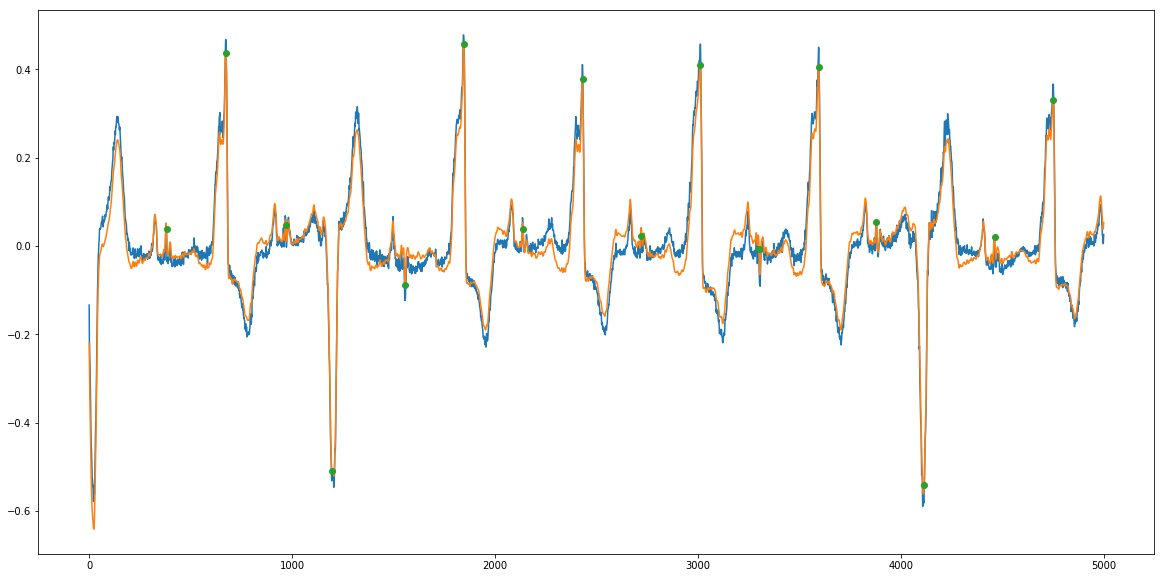

In [15]:
plt.plot(dataset["ecg"][0])
plt.plot(dataset["filtered_ecg"][0])
plt.plot(dataset["r_peak"][0], dataset["filtered_ecg"][0][dataset["r_peak"][0]], 'o')

In [16]:
import torch
torch.cuda.is_available()

True

In [17]:
from torch.utils.data import Dataset

In [18]:
SOS_TOKEN = -1
EOS_TOKEN = 5001

In [19]:
class EcgDataset(Dataset):
    def __init__(self, data, crop_size = 5000, use_raw = True):
        self.data = data
        self.crop_size = crop_size
        self.use_raw = use_raw
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        try:
            cut_point = 0 if self.crop_size >= 5000 else np.random.randint(5001 - self.crop_size)
            ecg = self.data["ecg" if self.use_raw else "filtered_ecg"].iloc[idx][cut_point:cut_point+self.crop_size]
            points = np.array([point-cut_point  for point in self.data['r_peak'].iloc[idx] if point >= cut_point and point < cut_point + self.crop_size])
            points_as_array = EOS_TOKEN * np.ones((self.crop_size,))
            points_as_array[:len(points)] = points
            labels = self.data["is_r_peak"].iloc[idx][cut_point:cut_point+self.crop_size]
        except:
            print(idx)
        return ecg, labels, points

In [20]:
dataset['ecg'].iloc[[2,3]].iloc[1]

array([-0.40740871, -0.62104242, -0.61362342, ...,  0.04569391,
        0.05198878,  0.0639296 ])

In [21]:
ecg_dataset = EcgDataset(dataset, 3000)

In [22]:
ecg_dataset[0]

(array([-0.09364049, -0.11175372, -0.13740243, ...,  0.07537291,
         0.07820179,  0.07087971]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([  22,  380,  669,  962, 1255, 1541, 1836, 2124, 2419, 2703, 2938]))

In [23]:
valid_size = 0.1
random_seed = 7

num_train = len(dataset)
indices = list(range(num_train))
split = int(np.floor(valid_size * num_train))


np.random.seed(random_seed)
np.random.shuffle(indices)

train_idx, valid_idx = indices[split:], indices[:split]
train_dataset = EcgDataset(dataset.iloc[train_idx], 3000)
valid_dataset = EcgDataset(dataset.iloc[valid_idx], 3000)

In [24]:
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [26]:
device = "cpu"

In [27]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.input_dim = input_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        self.dropout = dropout
        
        self.dense = nn.Linear(input_dim, hid_dim)
        
        self.rnn = nn.LSTM(hid_dim, hid_dim, n_layers, dropout = dropout)
        
        self.dropout = nn.Dropout(dropout)
        
    def init_hidden(self, batch_size):
        return torch.zeros((self.n_layers, batch_size, self.hid_dim), dtype = torch.float)
    
    def init_cell(self, batch_size):
        return torch.zeros((self.n_layers, batch_size, self.hid_dim), dtype = torch.float)
        
    def forward(self, src, h0, c0):
        
        #src = [seq len, batch size, input dim]
        #print(src.shape)
        
        embedded = self.dropout(self.dense(src))
        
        #embedded = [ seq len, batch size, hid dim]
        
        #print(embedded.shape)
        
        outputs, (hidden, cell) = self.rnn(embedded, (h0, c0))
        
        
        #print(outputs.shape)
        
        #outputs = [seq_len, batch,  hidden_size]
        #hidden = [num_layers, batch, hidden_size]
        #cell = [num_layers, batch, hidden_size]
        
        #outputs are always from the top hidden layer
        
        return hidden, cell

In [28]:
encoder = Encoder(1, 16, 2, 0.01)

In [29]:
ecg, labels, points = ecg_dataset[0]
ecg = torch.tensor([ecg]).view(-1, 1, 1).float()
points = torch.tensor([points]).view(-1, 1, 1).float()

In [30]:
h0 = encoder.init_hidden(1)
c0 = encoder.init_cell(1)

In [31]:
hidden, cell = encoder(ecg, h0, c0)

In [32]:
hidden.shape

torch.Size([2, 1, 16])

In [33]:
class Decoder(nn.Module):
    def __init__(self, output_dim, hid_dim, n_layers, dropout):
        super().__init__()

        self.hid_dim = hid_dim
        self.output_dim = output_dim
        self.n_layers = n_layers
        self.dropout = dropout
        
        self.dense_in = nn.Linear(output_dim, hid_dim)
        
        self.rnn = nn.LSTM(hid_dim, hid_dim, n_layers, dropout = dropout)
        
        self.dense_out = nn.Linear(hid_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden, cell):
        
        #input = [batch size, output_size]
        #hidden = [n layers, batch size, hid dim]
        #cell = [n layers, batch size, hid dim]
        
        #n directions in the decoder will both always be 1, therefore:
        #hidden = [n layers, batch size, hid dim]
        #context = [n layers, batch size, hid dim]
        
        input = input.unsqueeze(0)
        #print(input.shape)
        
        #input = [1, batch size, output_size]
        
        embedded = self.dropout(self.dense_in(input))
        #print(embedded.shape)
        
        #embedded = [1, batch size, hid dim]
                
        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))
        
        #output = [1, batch size, hid dim]
        #hidden = [n layers, batch size, hid dim]
        #cell = [n layers, batch size, hid dim]
        
        prediction = self.dense_out(output.squeeze(0))
        
        #prediction = [batch size, output dim]
        
        return prediction, hidden, cell

In [34]:
decoder = Decoder(1, 16, 2, 0.01)

In [35]:
pred, hidden2, cell2 = decoder(points[0], hidden, cell)

In [36]:
pred

tensor([[-0.0837]], grad_fn=<AddmmBackward>)

In [37]:
hidden2.shape

torch.Size([2, 1, 16])

In [38]:
import random

In [49]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
        assert encoder.hid_dim == decoder.hid_dim, \
            "Hidden dimensions of encoder and decoder must be equal!"
        assert encoder.n_layers == decoder.n_layers, \
            "Encoder and decoder must have equal number of layers!"
        
    def forward(self, src, trg, teacher_forcing_ratio = 0.5):
        
        #src = [src seq len, batch size, input dim]
        #trg = [trg seq len, batch size, output dim]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 we use ground-truth inputs 75% of the time
        
        src = src.to(self.device)
        trg = trg.to(self.device)
        
        batch_size = trg.shape[1]
        output_dim = trg.shape[2]
        max_len = trg.shape[0]
        
        #encoder init states
        h0 = encoder.init_hidden(batch_size).to(self.device)
        c0 = encoder.init_cell(batch_size).to(self.device)
        
        #tensor to store decoder outputs
        outputs = torch.zeros(max_len, batch_size, output_dim).to(self.device)
        
        #last hidden state of the encoder is used as the initial hidden state of the decoder
        hidden, cell = self.encoder(src, h0, c0)
        
        #first input to the decoder is the <sos> tokens
        input = SOS_TOKEN * torch.ones(batch_size, output_dim).to(self.device)
        
        for t in range(0, max_len):
            
            output, hidden, cell = self.decoder(input, hidden, cell)
            outputs[t] = output
            teacher_force = random.random() < teacher_forcing_ratio
            
            input = (trg[t] if teacher_force else output.round().detach())
        
        return outputs

In [50]:
points.shape

torch.Size([10, 1, 1])

In [51]:
seq2seq = Seq2Seq(encoder, decoder, "cpu")

In [52]:
seq2seq(ecg, points, 0.3)

tensor([[[4.2920]],

        [[4.4989]],

        [[4.5330]],

        [[4.5370]],

        [[4.5402]],

        [[4.5193]],

        [[4.5384]],

        [[4.5409]],

        [[4.5424]],

        [[4.5429]]], grad_fn=<CopySlices>)

In [53]:
encoder = Encoder(1, 16, 2, 0.01)
decoder = Decoder(1, 16, 2 , 0.01)
model = Seq2Seq(encoder, decoder, device)

In [54]:
optimizer = optim.Adam(model.parameters())
criterion = nn.MSELoss()

In [55]:
def train(model, dataset, n_epoch, optimizer, criterion, tfr=0.0, print_every = 100):
    model.train()
    total_step = len(dataset)
    for epoch in range(n_epoch):
        epoch_loss = 0
        
        indices = list(range(total_step))
        np.random.shuffle(indices)

        for i, ind in enumerate(indices):
            
            ecg, labels, points = dataset[ind]
            src = torch.tensor([ecg]).view(-1, 1, 1).float()
            trg = torch.tensor([points]).view(-1, 1, 1).float()

            optimizer.zero_grad()

            output = model(src, trg, tfr)

            loss = criterion(output, trg)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if (i % print_every == 0):
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, n_epoch, i+1, total_step, loss.item()))
                print("True: ", points)
                print("Pred: ", output.squeeze())
        
    
    

In [ ]:
train(model, train_dataset, 5, optimizer, criterion, tfr=0.3, print_every=10)

Epoch [1/5], Step [1/1800], Loss: 3183305.2500
True:  [  51  474  864 1248 1744 2121 2549 2984]
Pred:  tensor([0.2791, 0.2767, 0.2752, 0.2686, 0.2837, 0.2829, 0.2779, 0.2726],
       grad_fn=<SqueezeBackward0>)
Epoch [1/5], Step [11/1800], Loss: 2717766.5000
True:  [  60  202  374  519  687  835 1041 1182 1312 1499 1622 1747 1956 2163
 2351 2514 2636 2808]
Pred:  tensor([0.3712, 0.3720, 0.3717, 0.3542, 0.3813, 0.3914, 0.3901, 0.3864, 0.3933,
        0.4065, 0.4054, 0.4121, 0.4091, 0.4013, 0.3939, 0.3867, 0.4042, 0.4152],
       grad_fn=<SqueezeBackward0>)
Epoch [1/5], Step [21/1800], Loss: 3037626.0000
True:  [  64  272  472  642  811  984 1227 1391 1561 1741 1952 2179 2398 2581
 2768 2958]
Pred:  tensor([0.5214, 0.5315, 0.5368, 0.5415, 0.5389, 0.5490, 0.5585, 0.5666, 0.5593,
        0.5614, 0.5609, 0.5656, 0.5710, 0.5733, 0.5778, 0.5732],
       grad_fn=<SqueezeBackward0>)
Epoch [1/5], Step [31/1800], Loss: 2756254.0000
True:  [ 115  315  655  853 1189 1389 1727 1927 2264 2463 2801]
P

Epoch [1/5], Step [351/1800], Loss: 2761086.5000
True:  [ 185  522  860 1199 1532 1701 2053 2392 2725]
Pred:  tensor([8.9846, 9.0148, 9.0100, 9.0156, 9.0157, 9.0155, 9.0094, 9.0155, 9.0116],
       grad_fn=<SqueezeBackward0>)
Epoch [1/5], Step [361/1800], Loss: 3054098.2500
True:  [ 274  489  992 1352 1717 2087 2465 2855]
Pred:  tensor([9.1753, 9.1976, 9.1982, 9.1937, 9.1929, 9.1982, 9.1983, 9.1983],
       grad_fn=<SqueezeBackward0>)
Epoch [1/5], Step [371/1800], Loss: 2682049.7500
True:  [ 189  545  897 1245 1595 1953 2319 2692]
Pred:  tensor([9.3593, 9.3810, 9.3813, 9.3814, 9.3814, 9.3814, 9.3815, 9.3814],
       grad_fn=<SqueezeBackward0>)
Epoch [1/5], Step [381/1800], Loss: 3212008.0000
True:  [ 138  594  826 1280 1513 1968 2202 2662 2896]
Pred:  tensor([9.5450, 9.5658, 9.5663, 9.5665, 9.5664, 9.5664, 9.5664, 9.5665, 9.5665],
       grad_fn=<SqueezeBackward0>)
Epoch [1/5], Step [391/1800], Loss: 2823965.7500
True:  [ 139  403  669  935 1202 1470 1736 2001 2269 2499 2803]
Pred:  te